# Построение кривых Безье по 3 и 4 точкам в 2d & 3d

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(19680801)

# 2d

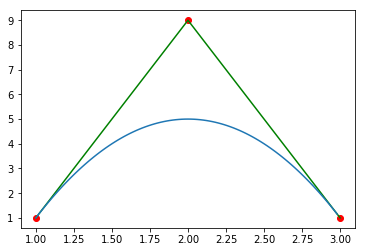

In [2]:
t = np.arange(0, 1, 0.01)

p1 = (1., 1.)
p2 = (2., 9.)
p3 = (3., 1.)

dots = (p1, p2, p3)

def bezie_3point(t, p1, p2, p3):
    ''' `x = (1−t) * 2 * x1 + 2 * (1−t) * t * x2 + t2 * x3` '''
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x = (1. - t) ** 2 * x1 + 2 * (1. - t) * t * x2 + t ** 2 * x3
    y = (1. - t) ** 2 * y1 + 2 * (1. - t) * t * y2 + t ** 2 * y3
    return (x, y)

dots_bezier = [bezie_3point(current_t, p1, p2, p3) for current_t in t.tolist()]

plt.plot(
    [dot[0] for dot in dots], 
    [dot[1] for dot in dots],
    'ro')

plt.plot(
    [dot[0] for dot in dots],
    [dot[1] for dot in dots],
    'g')

plt.plot(
    [dot[0] for dot in dots_bezier],
    [dot[1] for dot in dots_bezier]
)

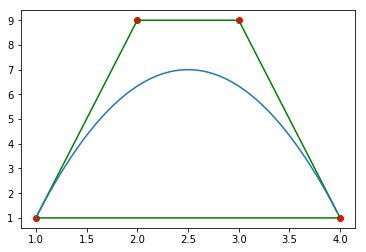

In [3]:
t = np.arange(0, 1, 0.01)

p1 = (1., 1.)
p2 = (2., 9.)
p3 = (3., 9.)
p4 = (4., 1.)

dots = (p1, p2, p3, p4)

def bezie_4point(t, p1, p2, p3, p4):
    '''  '''
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    x = (1. - t)**3 * x1 + 3 * (1. - t)**2 * t * x2 + 3 * (1. - t) * t**2 * x3 + t**3 * x4
    y = (1. - t)**3 * y1 + 3 * (1. - t)**2 * t * y2 + 3 * (1. - t) * t**2 * y3 + t**3 * y4
    return (x, y)

dots_bezier = [bezie_4point(current_t, p1, p2, p3, p4) for current_t in t.tolist()]

plt.plot(
    [dot[0] for dot in dots], 
    [dot[1] for dot in dots],
    'ro')

plt.plot(
    [dot[0] for dot in dots] + [dots[0][0]], 
    [dot[1] for dot in dots] + [dots[-1][1]],
    'g')


plt.plot(
    [dot[0] for dot in dots_bezier],
    [dot[1] for dot in dots_bezier]
)

In [4]:
def bezier_3d4(t, p1, p2, p3, p4):
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    x3, y3, z3 = p3
    x4, y4, z4 = p4
    x = x4 * t**3 + 3 * x3 * t**2 * (1 - t) + 3 * x2 * t * (1 - t)**2 + x1 * (1. - t)**3
    y = y4 * t**3 + 3 * y3 * t**2 * (1 - t) + 3 * y2 * t * (1 - t)**2 + y1 * (1. - t)**3
    z = z4 * t**3 + 3 * z3 * t**2 * (1 - t) + 3 * z2 * t * (1 - t)**2 + z1 * (1. - t)**3
    return [x, y, z]
    

p1 = (2, 2, 0)
p2 = (2, 3, 0)
p3 = (3, 3, 0)
p4 = (3, 2, 0)

dots = [p1, p2, p3, p4]
t = np.arange(0, 1, 0.01)

dots_bezier = [bezier_3d4(current_t, p1, p2, p3, p4) for current_t in t.tolist()]

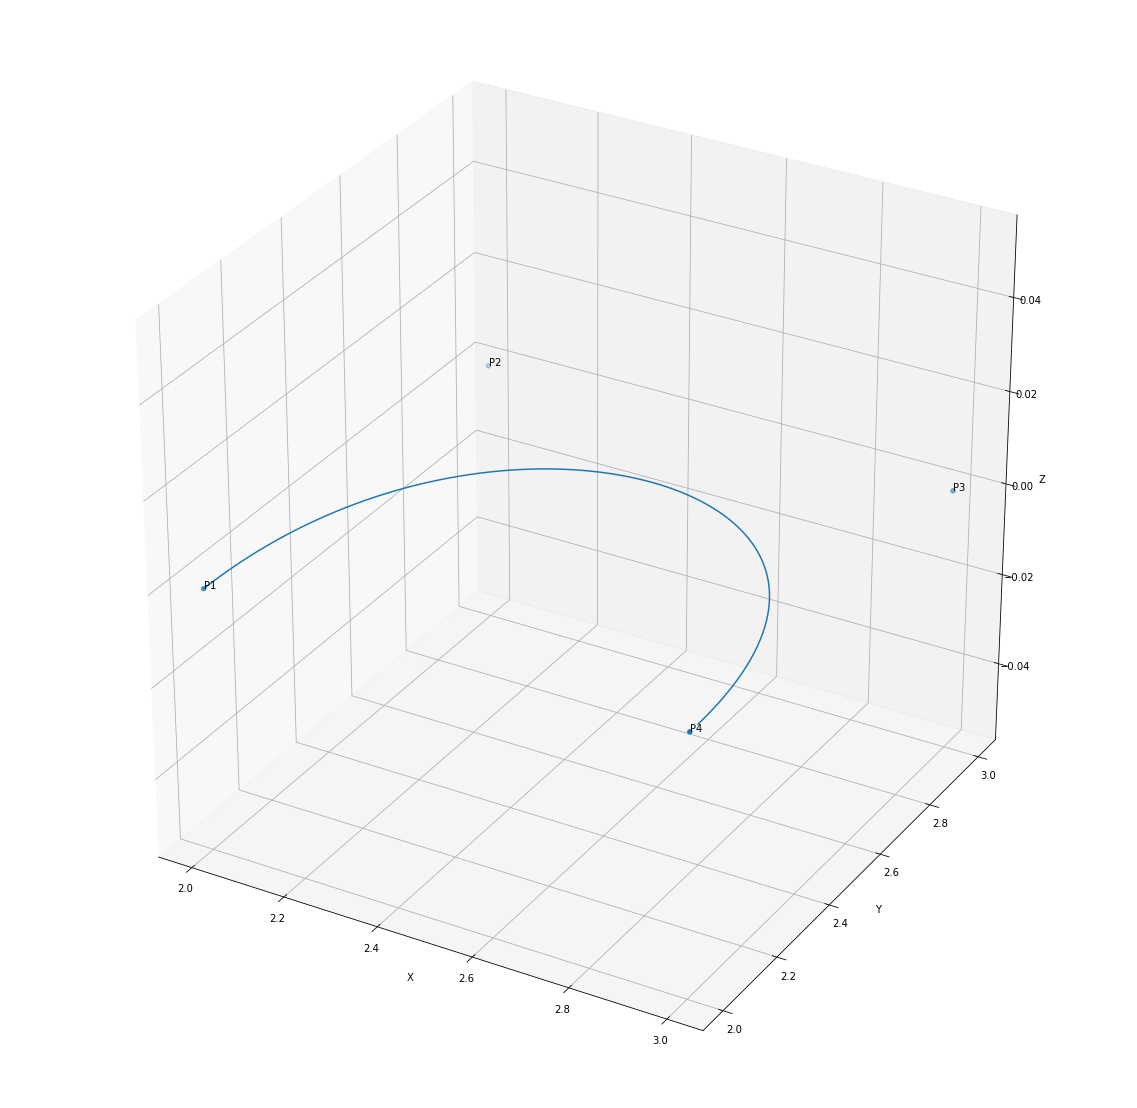

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import (
    Poly3DCollection,
    Line3DCollection)


fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax.plot(
    [dot[0] for dot in dots_bezier], 
    [dot[1] for dot in dots_bezier], 
    [dot[2] for dot in dots_bezier], 
)

ax.scatter(
    [dot[0] for dot in dots], 
    [dot[1] for dot in dots], 
    [dot[2] for dot in dots],
    marker='o'
)

#ax.quiver3D(p1[0], p1[1], p1[2], )

for num, dot in enumerate(dots):
    ax.text(dot[0], dot[1], dot[2], "P{0}".format(num + 1), color='black')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Плоскость в 3d

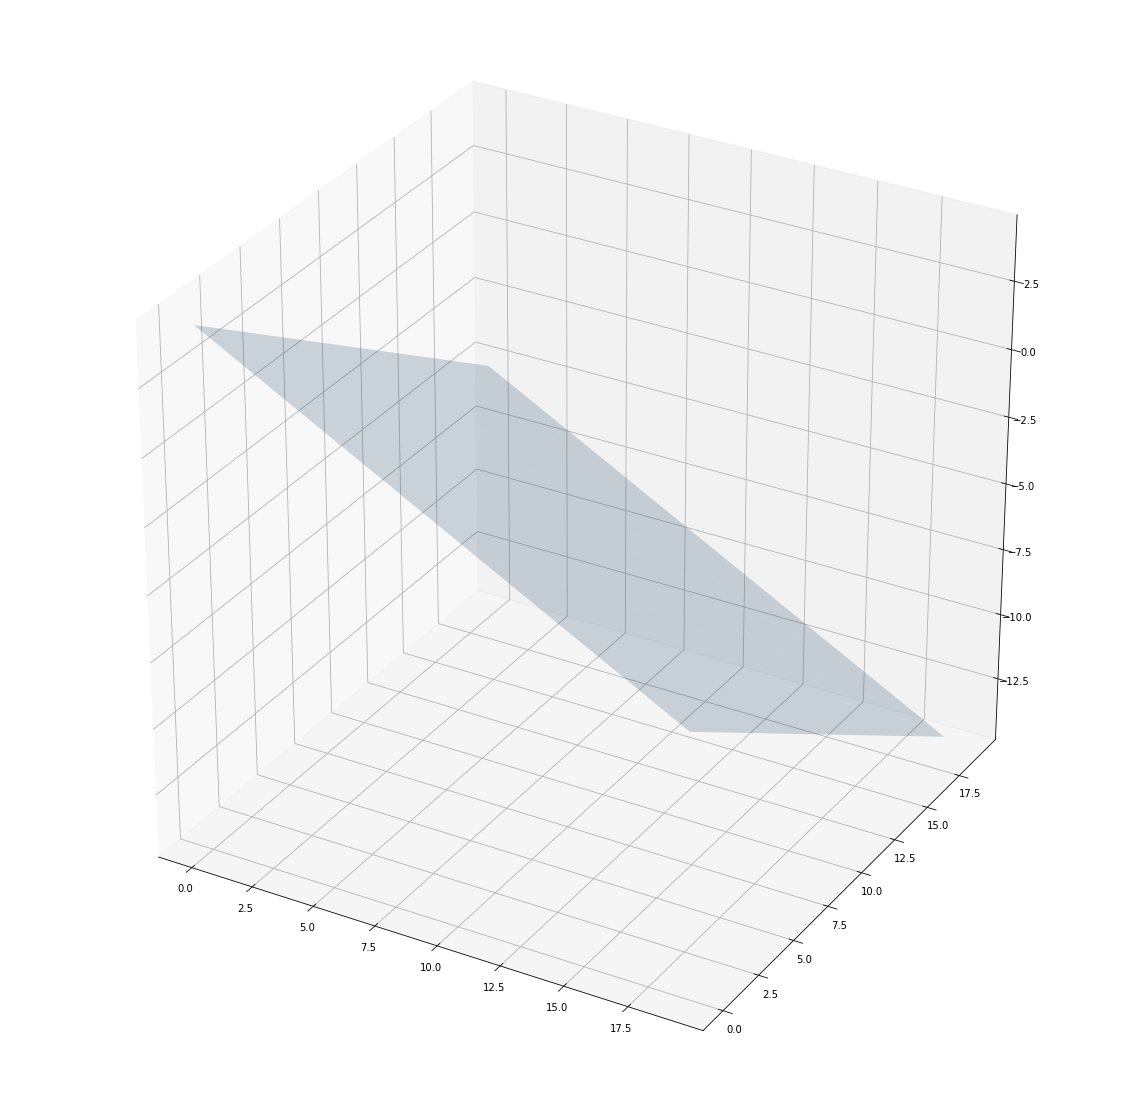

In [6]:
point = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

xx, yy = np.meshgrid(range(20), range(20))

d = -point.dot(normal)
z = (
    - normal[0] * xx - normal[1] * yy - d
) * 1. / normal[2]

z

plt3d = plt.figure(figsize=(20, 20)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)
